Universidade Federal de Santa Catarina<br>
Departamento de Engenharia Elétrica e Eletrônica<br>
EEL7514 / EEL7513 / EEL410250 - Aprendizado de Máquina
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\calS}{\mathcal{S}}$

# Exercício 7: Redes Profundas

Neste exercício você irá construir modelos de redes neurais para realizar classificação e experimentar diversas configurações de hiperparâmetros.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact
from sklearn.neural_network import MLPClassifier

import sys
import tensorflow as tf
print('Python version:', sys.version.split(' ')[0])
print('TensorFlow version:', tf.__version__)
print('GPU:', tf.config.list_physical_devices('GPU'))

Python version: 3.6.9
TensorFlow version: 2.3.0
GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# 1. Conjunto de dados #1

Para "aquecer", vamos começar utilizando o conjunto XOR do exercício anterior.

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
X_train, y_train = make_blobs(n_samples=400, n_features=2, centers=[[0,0],[1,1],[0,1],[1,0]], cluster_std=0.15, random_state=0)
y_train = (y_train >= 2).astype(int)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/4, random_state=0)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(300, 2) (300,)
(100, 2) (100,)


1. Usando a biblioteca sklearn, treine uma rede neural de 2 camadas (1 oculta) para classificação. Utilize o otimizador Adam com parâmetros padrão, exceto pela taxa de aprendizado (constante), que deve ser escolhida apropriadamente. Obtenha 100% de acurácia de treinamento e de validação e calcule o valor da perda ao final do treinamento. Além disso, trace a curva da perda de treinamento ao longo das épocas.

#### Dicas
- Para obter a curva de perda no treinamento, você pode utilizar `model.loss_curve_`.
- Note que o sklearn usa uma terminologia por vezes inconsistente com a literatura da área (mas consistente internamente em sua API). Por exemplo, o parâmetro `max_iter` corresponde ao número de épocas, não necessariamente ao número de atualizações de pesos. Outro aspecto incômodo é juntar todos os hiperparâmetros do treinamento dentro da definição do modelo, o que além de tornar a chamada extensa, faz com que, dependendo da configuração, alguns parâmetros se tornem desnecessários ou mudem de definição.

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss

In [4]:
@interact(lr = ['constant', 'invscaling', 'adaptive'], units = (0,100,10)) 
def _(lr,units):
  model = MLPClassifier(hidden_layer_sizes=[units], activation='relu', solver = 'adam', learning_rate=lr,)
  model.fit(X_train,y_train)
  print(f'Train accuracy: {round(model.score(X_train,y_train),2)*100}%')
  print(f'  Val accuracy: {round(model.score(X_val,y_val),2)*100}%')
  print(f'loss: {model.loss_}')
  plt.plot(model.loss_curve_)

interactive(children=(Dropdown(description='lr', options=('constant', 'invscaling', 'adaptive'), value='consta…

Train accuracy: 100.0%
  Val accuracy: 100.0%
loss: 0.1351351726562674


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


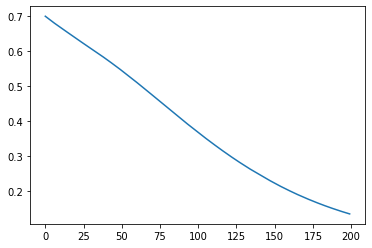

In [5]:
  model = MLPClassifier(hidden_layer_sizes=[100], activation='relu', solver = 'adam', learning_rate='constant')
  model.fit(X_train,y_train)
  print(f'Train accuracy: {round(model.score(X_train,y_train),2)*100}%')
  print(f'  Val accuracy: {round(model.score(X_val,y_val),2)*100}%')
  print(f'loss: {model.loss_}')
  plt.plot(model.loss_curve_)

2. Repita o item anterior usando [Keras](https://keras.io/), a API de alto-nível do [TensorFlow](https://www.tensorflow.org/), disponível através do módulo `tensorflow.keras`. Certifique-se de estar usando TensorFlow 2.x.


### Dicas
- Ao invés de instalar o TensorFlow e rodar localmente em sua máquina, uma opção mais simples é utilizar o serviço em nuvem gratuito [Google Colab](https://colab.research.google.com), que já possui todas as bibliotecas necessárias instaladas, inclusive o TensorFlow 2.x.

- Leia a documentação do Keras para aprender a utilizá-lo. Para quem está começando, é recomendável (e suficiente para este exercício) usar a classe [Sequential](https://keras.io/guides/sequential_model). É útil também conhecer sobre funções de [ativação](https://keras.io/activations), funções de [perda](https://keras.io/losses), métodos de [otimização](https://keras.io/api/optimizers) e o processo de [treinamento e avaliação](https://keras.io/guides/training_with_built_in_methods/) de modelos.
- No Keras, ao contrário do sklearn, é necessário especificar explicitamente a camada de saída, sua função de ativação, e a função de perda utilizada. (No sklearn, essa escolha é automática a partir dos valores encontrados em `y_train`.) 
- É recommendável utilizar o comando `model.summary()` para obter uma descrição de todas as camadas da rede neural.
- Para configurar a taxa de aprendizado, é necessário instanciar um otimizador, caso contrário será usado o valor padrão.
- Para obter a curva de perda no treinamento, utilize 
```python
history = model.fit(...)
history.history['loss']
```
- Se quiser garantir a reprodutibilidade, utilize `tf.random.set_seed()` **antes** de definir o modelo (os pesos são inicializados no momento da adição de cada camada).


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
model = tf.random.set_seed(40)
model = Sequential()
#Dense(neuronios, função, input_shape = número de atributos)
model.add(layers.Dense(units = 50, activation = 'relu', input_dim = ( X_train.shape[1]), name = 'input')) # camada oculta
model.add(layers.Dense(units = 1, activation = 'sigmoid', name = 'output')) # camada de saída
#optimizer = keras.optimizers.Adam(learning_rate =0.01)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs = 200)

In [34]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 50)                150       
_________________________________________________________________
output (Dense)               (None, 1)                 51        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [35]:
print(f'Train accuracy: {model.evaluate(X_train,y_train)[1] * 100}%')
print(f'  Val accuracy: {model.evaluate(X_val,y_val)[1] * 100}%')

10/10 [==============================] - 0s 2ms/step - loss: 0.0138 - accuracy: 1.0000
Train accuracy: 100.0%
4/4 [==============================] - 0s 2ms/step - loss: 0.0180 - accuracy: 1.0000
  Val accuracy: 100.0%


In [36]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


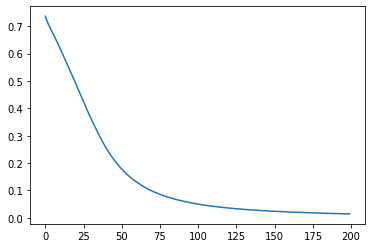

In [37]:
plt.plot(history.history['loss'])

# 2. Conjunto de dados #2

A partir de agora, desenvolva seus modelos de aprendizado profundo utilizando o Keras/TensorFlow, o qual possui muito mais recursos do que o sklearn e é mais otimizado para desempenho.

O segundo conjunto de dados é o conjunto de dígitos manuscritos [MNIST](https://en.wikipedia.org/wiki/MNIST_database), o qual possui 70000 amostras, sendo 10000 amostras de teste. Este é um conjunto clássico e -- embora não seja mais recomendado para avaliação do estado da arte -- ainda vastamente utilizado para experimentação e aprendizado. O conjunto pode ser facilmente carregado pelos comandos abaixo.

In [78]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Observe a diferença na notação convencional quando usamos o Keras (ou qualquer outro *framework* de aprendizado profundo): `x` (minúsculo) ao invés de `X` (maiúsculo). Isto ocorre porque o Keras nos permite trabalhar diretamente com os dados em seu formato original, neste caso, como um tensor 3D. Portanto, não é necessário redimensionar (*reshape*) os dados antes de aplicar o modelo, assim como perde o sentido usar uma notação especial para denotar uma matriz (tensor 2D).

Caso seja necessário redimensionar os dados em algum estágio do modelo, isso pode ser feito internamente com camadas do Keras. Em particular, para redimensionar para o formato convencional de tensor 2D `(n_samples, n_features)`, pode ser usada a camada `Flatten`. Isto é sempre necessário antes de aplicar uma camada `Dense`, a qual só opera na última dimensão. No nosso caso, as duas dimensões (28,28) serão "achatadas" em uma única de (784,):

In [79]:
from tensorflow.keras.layers import Flatten
model = Sequential()
model.add(tf.keras.Input(shape=(28,28)))
model.add(Flatten())
model.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


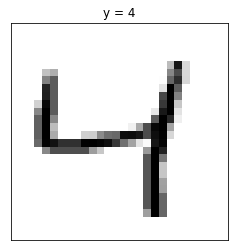

In [80]:
# Exemplo de uma imagem
i = 2
plt.imshow(x_train[i], cmap=plt.cm.gray_r);
plt.title('y = {}'.format(y_train[i]));
plt.xticks([]);
plt.yticks([]);

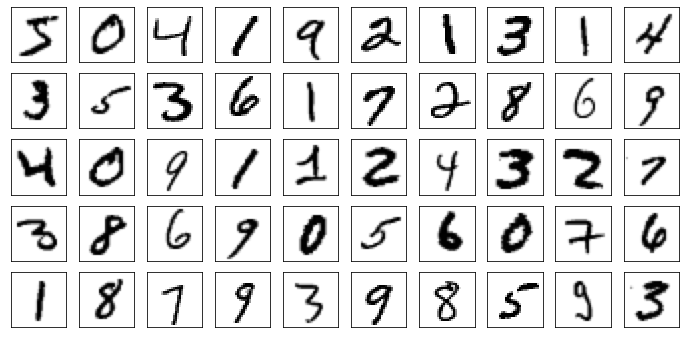

In [81]:
plt.figure(figsize=(12,12))
for i in range(50):
    plt.subplot(10,10,i+1)
    plt.imshow(x_train[i], cmap=plt.cm.gray_r);
    plt.xticks([]);
    plt.yticks([]);

## Tarefas

1. Separe um conjunto de validação com 5000 amostras (por exemplo, as últimas 5000 amostras do conjunto de treinamento). Confirme que a distribuição das classes é parecida com a do conjunto de treinamento (não precisa ser exatamente igual).

#### Dica
- Para calcular e visualizar um histograma, você pode utilizar a função `plt.hist()`, opcionalmente definindo os parâmetros `density` e `alpha`, entre outros.

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.08333, random_state=42)

In [83]:
print('NOVO SHAPE:')
print(f'Train: {x_train.shape, y_train.shape}')
print(f'  Val: {x_val.shape, y_val.shape}')
print('-'*40)
print('Distribuição de classes:')
print(f'Train: {len(np.unique(y_train))}')
print(f'  Val: {len(np.unique(y_val))}')

NOVO SHAPE:
Train: ((55000, 28, 28), (55000,))
  Val: ((5000, 28, 28), (5000,))
----------------------------------------
Distribuição de classes:
Train: 10
  Val: 10


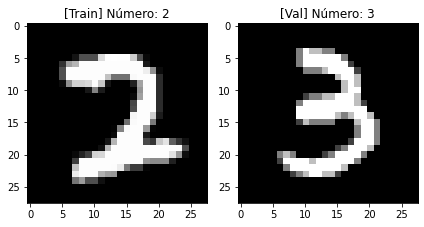

In [84]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(x_train[1], cmap='gray')
ax1.set_title(f'[Train] Número: {y_train[1]}')

ax2.imshow(x_val[1], cmap='gray')
ax2.set_title(f'[Val] Número: {y_val[1]}')
plt.tight_layout()

2. Para desenvolvimento do modelo, considere um subconjunto de treinamento com poucas amostras, por exemplo, as primeiras 10000, e também um número pequeno de épocas, por exemplo, 10. Isso vai permitir uma rápida experimentação. Uma vez finalizado o desenvolvimento, você poderá aumentar esses valores. Inicialmente, construa um modelo **baseline** sem nenhuma camada oculta, treine-o e confirme que está funcionando corretamente.
1. Por hora, ignore o conjunto de validação. Tente obter 100% de acurácia de treinamento (com o conjunto reduzido) e apenas 10 épocas. O objetivo é garantir que o modelo possui capacidade suficiente para este problema. Fique à vontade para variar quaisquer hiperparâmetros do modelo ou do treinamento, mas utilize apenas conceitos já abordados na disciplina (i.e., não utilize camadas convolucionais). Tenha em mente as seguintes observações:
 - A taxa de aprendizado é provavelmente o hiperparâmetro mais importante, no sentido de que, mesmo que você consiga supostamente encontrar os melhores valores de todos os demais hiperparâmetros (inclusive da arquitetura do modelo), ainda assim o modelo poderá ter um desempenho ruim se a taxa de aprendizado não for ajustada adequadamente.
 - Em geral, cada modificação em algum hiperparâmetro pode exigir um novo ajuste da taxa de aprendizado (i.e., o seu valor ótimo pode mudar), embora alguns hiperparâmetros tenham um impacto maior do que outros.
 - O batch size tem um impacto grande na velocidade do treinamento, além de impactar no desempenho do modelo. De maneira geral, aumentar o batch size reduz o tempo de treinamento de uma época (por quê?), mas pode piorar o desempenho para um número fixo de épocas (por quê?). Assim, uma recomendação básica é utilizar o maior batch size possível tal que o desempenho do modelo (para um número fixo de épocas) não apresente degradação significativa. Minimizar o tempo de treinamento é essencial para uma rápida experimentação.
 - Naturalmente, o desempenho ótimo para cada valor de batch size envolve um ajuste da taxa de aprendizado. Uma regra prática (empírica) é: se o batch size é multiplicado por um fator F, então, para obter um desempenho semelhante, a taxa de aprendizado também deve ser multiplicada por F. Note que essa regra não é exata, mas serve como um bom ponto de partida.
1. Relate suas principais observações sobre quais abordagens foram bem sucedidas ou não.

#### Dicas
- Para um problema multi-classe com codificação compacta $y \in \{0,1,\ldots,9\}$ (i.e., que **não** é *one-hot encoding*), a função perda adequada é a `'sparse_categorical_crossentropy'`. Nesse caso não é necessário codificar como *one-hot*.
- O Keras permite monitorar, durante o treinamento, não apenas a perda, mas também outras métricas, como a acurácia, tanto de treinamento quanto de validação. Para isso, configure o parâmetro `metrics` ao executar `model.compile`. As curvas estarão disponíveis no parâmetro history.
- Para avaliar o efeito de um hiperparâmetro, é muito útil garantir que não há outras fontes de "ruído" ou variação, assim cada hiperparâmetro pode ser avaliado isoladamente. Em particular, a inicialização dos pesos do modelo deve ser determinística. Para isso, utilize `tf.random.set_seed()` antes de definir o modelo. Isso também garante a reprodutibilidade dos resultados, caso você precise executar o treinamento novamente.
- Para medir o tempo de execução de uma célula do notebook, utilize `%%time` na primeira linha da célula.
- É usual (e tipicamente suficiente) variar o batch size em potências de 2.
- Se desejar utilizar a GPU do Colab para acelerar o treinamento, selecione-a no menu *Runtime/Change runtime type*. Para os modelos deste exercício, porém, o ganho computacional provavelmente não será tão expressivo. Note também que é possível que a inicialização de pesos seja diferente de quando o modelo é executado sem GPU, ainda que a mesma *random seed* tenha sido definida.

In [124]:
%%time
input = 28*28
model = tf.random.set_seed(42)
model = Sequential()
model.add(Flatten()) # 784 inputs
model.add(layers.Dense(units = 10, activation = 'softmax', name = 'output')) # camada de saída

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train[:10000],y_train[:10000], epochs = 10, batch_size=32, verbose=1)

Epoch 1/10
313/313 [==============================] - 1s 2ms/step - loss: 0.4655 - accuracy: 0.8624
Epoch 2/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3212 - accuracy: 0.9066
Epoch 3/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2879 - accuracy: 0.9183
Epoch 4/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2733 - accuracy: 0.9214
Epoch 5/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2542 - accuracy: 0.9268
Epoch 6/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2471 - accuracy: 0.9239
Epoch 7/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2332 - accuracy: 0.9299
Epoch 8/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2260 - accuracy: 0.9306
Epoch 9/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2181 - accuracy: 0.9353
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2132 - accuracy: 0.9347

In [94]:
model.evaluate(x_train[:10000],y_train[:10000])

313/313 [==============================] - 1s 2ms/step - loss: 0.1620 - accuracy: 0.9526


[0.16195154190063477, 0.9526000022888184]

### Tente obter 100% de acurácia de treinamento (com o conjunto reduzido) e apenas 10 épocas

In [138]:
%%time
input = 28*28
model = tf.random.set_seed(10)
model = Sequential()
model.add(Flatten()) # 784 inputs
model.add(layers.Dense(units = 128, activation = 'relu', input_shape = (28,28) , name = 'input1'))
model.add(layers.Dense(units = 1, activation = 'softmax', name = 'output')) # camada de saída


optimizer = tf.keras.optimizers.Adam(learning_rate = 0.03)
model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train[:10000],y_train[:10000], epochs = 10, batch_size=32)

Epoch 1/10
313/313 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0990
Epoch 2/10
313/313 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0986
Epoch 3/10
313/313 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0986
Epoch 4/10
313/313 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0986
Epoch 5/10
313/313 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0986
Epoch 6/10
313/313 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0986
Epoch 7/10
313/313 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0986
Epoch 8/10
313/313 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0986
Epoch 9/10
313/313 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0986
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0986
CPU times: user 8.49 s, sys: 

In [128]:
model.summary()

Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_44 (Flatten)         (None, 784)               0         
_________________________________________________________________
input1 (Dense)               (None, 128)               100480    
_________________________________________________________________
output (Dense)               (None, 1)                 129       
Total params: 100,609
Trainable params: 100,609
Non-trainable params: 0
_________________________________________________________________


In [139]:
model.evaluate(x_train[:10000],y_train[:10000])

313/313 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0986


[nan, 0.09860000014305115]

5. Agora, monitore também a acurácia de validação ao longo do treinamento, e ao final trace dois gráficos em função do número de épocas, um com a perda de treinamento e de validação e outro com a acurácia de treinamento e de validação.
1. Altere o tamanho do conjunto de treinamento para 55000 e veja se consegue obter uma acurácia de validação de pelo menos 98% (em alguma época). A partir de agora, utilize quantas épocas desejar. Ao final do treinamento, sempre trace as curvas de perda e acurácia para os dois conjuntos.
1. Mantenha os hiperparâmetros do modelo e altere apenas o tamanho do conjunto de treinamento. Trace um gráfico da acurácia de treinamento e da acurácia máxima de validação (para alguma época) em função do tamanho do conjunto de treinamento, por exemplo, em intervalos de 5 ou 10 mil amostras, até o máximo de 55000. Esta curva é conhecida em alguns contextos como curva de aprendizado (*learning curve*). Trace também o gráfico da época ótima em que foi obtida a máxima acurácia de validação, em função do tamanho do conjunto de treinamento. Que conclusões podem ser tiradas a partir desses resultados?
1. Finalmente, utilize todas as 60000 amostras para treinamento (e naturalmente não utilize conjunto de validação), com um número de épocas apropriadamente escolhido. Em seguida, meça o desempenho no conjunto de teste.
1. Para o modelo final que você desenvolveu, mostre alguns exemplos de predições erradas no conjunto de teste.
1. Visualize como uma imagem os pesos da primeira camada oculta. Para isso, rode a célula abaixo:


In [ ]:
W = model.weights[0].numpy()
vmax = np.abs(W).max()
@interact(i=(0,int(np.ceil(W.shape[1]/10))-1))
def _(i=0):
  plt.figure(figsize=(16,2.4));
  # para ver de 10 em 10
  for j in range(min(10, W.shape[1]-10*i)):
    plt.subplot(1,10,j+1)
    w = W[:,10*i+j].reshape(28,28)
    plt.imshow(w, cmap=plt.cm.bwr, vmin=-vmax, vmax=vmax); # (-,0,+) = (blue, white, red)
    plt.xticks([]);
    plt.yticks([]);

11. Relate suas principais conclusões com este exercício.
1. (OPCIONAL) O que acontece se é aplicada uma permutação aleatória nos pixels de todas as imagens (a mesma permutação para todas as imagens)? O desempenho do modelo se altera? Você consegue identificar corretamente os dígitos? O que podemos concluir sobre o aprendizado do modelo?

#### Dicas
- Funções úteis: `plt.figure(figsize=(...))`, `plt.subplot()`, `plt.plot(..., label=...)`, `plt.xlabel()`, `plt.legend()`
- Quando usamos *early stopping*, perdemos parcialmente o controle sobre o número de épocas de treinamento como um hiperparâmetro. Nesse caso, após o desenvolvimento de um modelo, se desejarmos identificar seus hiperparâmetros, é conveniente registrar e fixar o número de épocas de treinamento efetivamente utilizadas e parar de utilizar *early stopping*.
- Se quiser salvar o melhor modelo encontrado, mas sem usar *early stopping*, você pode utilizar a *callback* `tf.keras.callbacks.ModelCheckpoint`. Alternativamente, você pode usar *early stopping* com uma paciência suficientemente grande (maior que o número de épocas).